# Trabalho Final – Programando IA com Python

#### Bibliotecas principais

In [474]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import datetime

## 1. Leia o arquivo lemonades.csv usando pandas

In [440]:
Lemonades = pd.read_csv('data/Lemonades.csv', delimiter=';')
Lemonades.head()

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25
3,07/04/2016,Beach,134,99,76,98.0,0.25
4,07/05/2016,Beach,159,118,78,135.0,0.25


## 2. Retorne as informações sobre as colunas e as principais estatísticas sobre o dataset

#### °Formato do dataframe: linhas x colunas

In [441]:
print('formato: ', Lemonades.shape)

formato:  (32, 7)


In [442]:
#tipo de dados por colunas
print(Lemonades.dtypes)

Date            object
Location        object
Lemon            int64
Orange           int64
Temperature      int64
Leaflets       float64
Price          float64
dtype: object


#### °Principais estatísticas

In [443]:
print(Lemonades.describe())

#Categóricos
print('\n',Lemonades.groupby(by =['Location']).size())

            Lemon      Orange  Temperature    Leaflets      Price
count   32.000000   32.000000    32.000000   31.000000  32.000000
mean   116.156250   80.000000    78.968750  108.548387   0.354687
std     25.823357   21.863211     4.067847   20.117718   0.113137
min     71.000000   42.000000    70.000000   68.000000   0.250000
25%     98.000000   66.750000    77.000000   90.000000   0.250000
50%    113.500000   76.500000    80.500000  108.000000   0.350000
75%    131.750000   95.000000    82.000000  124.000000   0.500000
max    176.000000  129.000000    84.000000  158.000000   0.500000

 Location
Beach    17
Park     15
dtype: int64


#### °Estátiscas por localização

In [444]:
print('Média')
print(Lemonades.groupby(by =['Location']).mean())
print('\nMediana')
print(Lemonades.groupby(by =['Location']).median())
print('\nQuantidade')
print(Lemonades.groupby(by =['Location']).count())
print('\nDesvio Padrão')
print(Lemonades.groupby(by =['Location']).std())
print('\nMínimo')
print(Lemonades.groupby(by =['Location']).min())
print('\nMáximo')
print(Lemonades.groupby(by =['Location']).max())

Média
               Lemon     Orange  Temperature    Leaflets     Price
Location                                                          
Beach     118.823529  82.470588    79.705882  108.058824  0.305882
Park      113.133333  77.200000    78.133333  109.142857  0.410000

Mediana
          Lemon  Orange  Temperature  Leaflets  Price
Location                                             
Beach       122      85           81     108.0   0.25
Park        110      75           80     106.0   0.50

Quantidade
          Date  Lemon  Orange  Temperature  Leaflets  Price
Location                                                   
Beach       16     17      17           17        17     17
Park        15     15      15           15        14     15

Desvio Padrão
              Lemon     Orange  Temperature   Leaflets     Price
Location                                                        
Beach     25.476056  21.940595     3.077432  20.882022  0.098238
Park      26.765828  22.191375     4.94

## 3. Realize a limpeza do dataset:

### a. verifique se existe valores nulos

In [445]:
Lemonades.isna().sum()

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64

### b. verifique e remova, se existir, linhas duplicadas

In [446]:
#Verifica valor faltante
Lemonades[Lemonades.duplicated()]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
6,07/06/2016,Beach,103,69,82,90.0,0.25


In [447]:
#Exclui Linhas encontradas
Lemonades = Lemonades.drop_duplicates()

In [448]:
#Verifica se ainda temos linhas duplicadas
Lemonades[Lemonades.duplicated()]

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price


### c. trate os elementos faltantes (interpolação (data) e media)

In [449]:
#Tratamento da Coluna Leaflets
Lemonades['Leaflets'] = Lemonades['Leaflets'].fillna(Lemonades['Leaflets'].mean())

In [450]:
#Tratamento e indexando a Coluna Date
Lemonades['Date'] = Lemonades['Date'].fillna('07/08/2016')
Lemonades['Date'] = pd.to_datetime(Lemonades['Date'])
Lemonades = Lemonades.set_index('Date')

In [451]:
#Tratamento de dado faltante da Coluna Date com interpolate
#Lemonades.interpolate(method ='linear', eixo ='indice') 

## 4. Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja


In [452]:
Lemonades['Sales'] = Lemonades['Orange'] + Lemonades['Lemon']
Lemonades.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
Date,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25,164
2016-07-02,Park,98,67,72,90.0,0.25,165
2016-07-03,Park,110,77,71,104.0,0.25,187
2016-07-04,Beach,134,99,76,98.0,0.25,233
2016-07-05,Beach,159,118,78,135.0,0.25,277


## 5. Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)


In [453]:
Lemonades['Revenue'] = Lemonades['Sales'] * Lemonades['Price']
Lemonades.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2016-07-03,Park,110,77,71,104.0,0.25,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.25,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.25,277,69.25


## 6. Escreva uma função que retorne o lucro total


In [465]:
def calc_total(df):
    return df['Revenue'].sum()

lemonades = calc_total(Lemonades)

## 7. Escreva uma função que receba dois parâmetros, dataset e temp(int). Se temp for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do período observado; se -1, retorna a temperatura mínima


In [466]:
def multi_calculate(df, temp):
    if temp == 1:
        return df['Temperature'].max()
    elif temp == 0:
        return df['Temperature'].mean()
    elif temp == -1:
        return df['Temperature'].min()
    
print(multi_calculate(Lemonades, 1))
print(multi_calculate(Lemonades, 0))
print(multi_calculate(Lemonades, -1))

84
78.87096774193549
70


## 8. Escreva uma função que receba dois parâmetros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach'


In [467]:
def adjust(df, loc):
    if loc == 'Park':
        df['Price'] = df['Price'] * 1.15
        return df 
    elif loc == 'Beach':
        df['Price'] = df['Price'] * 1.10
        return df 
    else:
        return 'You need to specify Park or Beach'
    


In [468]:
df = adjust(Lemonades, 'Park')
df.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.363687,164,41.00
2016-07-02,Park,98,67,72,90.0,0.363687,165,41.25
2016-07-03,Park,110,77,71,104.0,0.363687,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.363687,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.363687,277,69.25


In [469]:
df = adjust(Lemonades, 'Beach')
df.head()

,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
Date,,,,,,,,
2016-07-01,Park,97,67,70,90.0,0.400056,164,41.00
2016-07-02,Park,98,67,72,90.0,0.400056,165,41.25
2016-07-03,Park,110,77,71,104.0,0.400056,187,46.75
2016-07-04,Beach,134,99,76,98.0,0.400056,233,58.25
2016-07-05,Beach,159,118,78,135.0,0.400056,277,69.25


## 9. Escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank (descendente)


In [497]:
def RankTemperature(df):
    df['Rank'] = df['Temperature'].rank(ascending=0)
    return df.sort_values(by='Rank')

print (RankTemperature(Lemonades))

           Location  Lemon  Orange  Temperature    Leaflets     Price  Sales  \
Date                                                                           
2016-07-25     Park    156     113           84  135.000000  0.800112    269   
2016-07-12    Beach    130      95           84   99.000000  0.400056    225   
2016-07-26     Park    176     129           83  158.000000  0.560079    305   
2016-07-11    Beach    162     120           83  135.000000  0.400056    282   
2016-07-24     Park    121      82           82  117.000000  0.800112    203   
2016-07-30    Beach     88      57           82   81.000000  0.560079    145   
2016-07-10    Beach    140      98           82  131.000000  0.400056    238   
2016-07-31    Beach     76      47           82   68.000000  0.560079    123   
2016-07-06    Beach    103      69           82   90.000000  0.400056    172   
2016-07-28     Park     96      63           82   90.000000  0.560079    159   
2016-07-08    Beach    123      86      

## 10. Imprima um gráfico de linha que retorne o lucro ao longo do tempo


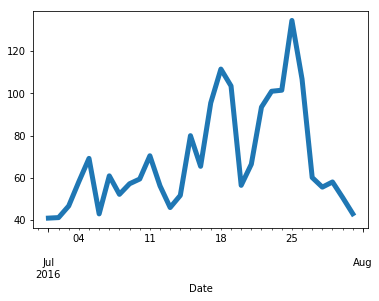

In [482]:
Lemonades['Revenue'].plot(linewidth=5)
plt.show()

## 11. Crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados? (Use a correlação de Pearson e explique o significado do valor obtido por ela)


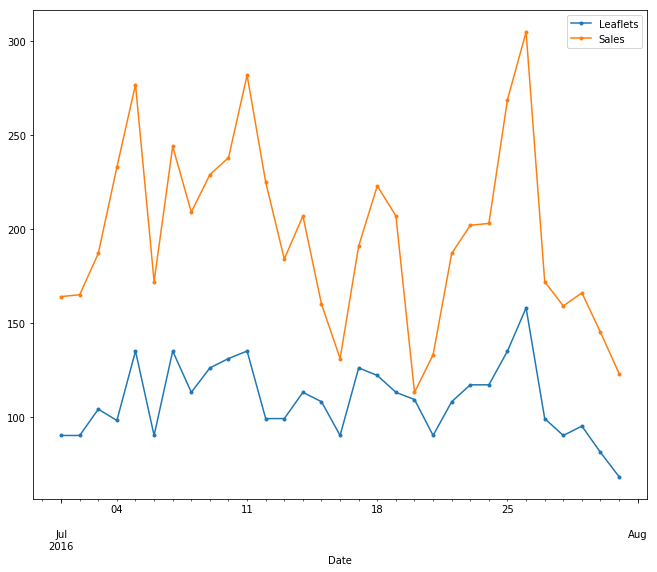

In [492]:
#Scatter
cols_plot = ['Leaflets', 'Sales']
axes = Lemonades[cols_plot].plot(marker='.', figsize=(11, 9))
plt.show()

In [491]:
#Correlação de coeficiente
np.corrcoef(Lemonades[cols_plot])[0, 1]

0.9999999999999999

#### Como podem perceber, a coluna Leaflets tem uma correção forte correlação com a coluna sale, ou seja, quanto mais panfletos entregues maior as chances de aumentas o volume de vendas.

## 12. Crie um histograma com 10 bins que mostre o lucro (revenue)


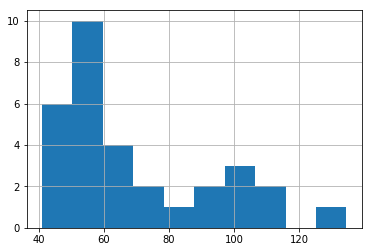

In [496]:
Lemonades['Revenue'].hist(bins=10)
plt.show()

## 13. Crie um gráfico de linha que mostre o lucro por tipo de fruta ao longo do tempo


## 14. Ajuste uma Regressão Linear aos dados para predizer vendas usando cada uma das features abaixo:



###  a. Temperature


###  b. Leaflets


###  c. Price

## 15. Retorne um gráfico com a reta ajustada aos dados para cada feature e diga se ela é uma variável boa ou não para predizer vendas. Comente o resultado obtido


## 16. Ajuste uma Regressão Linear aos dados para predizer vendas usando as três features juntas. Comente o resultado obtido


## 17. Generalize o algoritmo de Regressão Linear implementada em sala para que ele possa ser usado para regressão multivariada


## 18. Aplique o algoritmo implementado na questão 16 no conjunto de dados consumo_cerveja.csv usando as mesmas features para treinamento:


## 19. Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning


## 20. Prediga o consumo usando seu modelo e o modelo da sklearn


## 21. Calcule o MSE de ambos